In [2]:
import numpy as np
from scipy import spatial  # For finding K closest pts

class KNN:
    
    def __init__(self, n_neighbors=5):
        self.k = n_neighbors
        
    def euclidean_distance(self, X1, X2, y1, y2):
        # Simply returns euc. dist. of two points in a 2D space
        return np.sqrt((X1 - X2)**2 + (y1 - y2)**2)
        
    def fit(self, X, y):
        # Setting X and y values to be training
        self.X_train = X
        self.y_train = y
         
    def predict(self, X):
        distances = self.kClosestPoints(X)
        classes = []
        for key, val in distances.items():
            classes.append(val)
        
        return max(classes, key=classes.count)
        
    def kClosestPoints(self, unknown_pt):
        distances = {}
        
        for index, (x, y) in enumerate(self.X_train):
            curr_dist = self.euclidean_distance(x, unknown_pt[0], y, unknown_pt[1])
            # Setting the curr. dist. to its corresponding label (0, 1, etc...)
            distances[curr_dist] = self.y_train[index]
        
        # Sorting the distances from greatest to least
        distances = {k: v for k, v in sorted(distances.items(), key=lambda item: item[0])}
        # Retreving only the first K amount of keys/labels
        return {k: distances[k] for k in list(distances)[:self.k]}
        
    def score(self, y_pred, y_actual):
        pass

    

In [32]:
np.random.randint(1, 3)

2

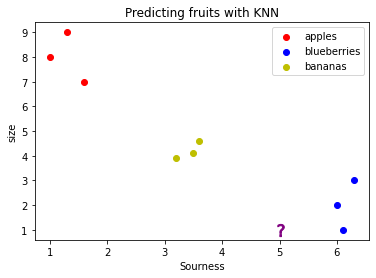

I predict that this belongs to Class: blueberries


In [52]:
import matplotlib.pyplot as plt

X = np.array([[1, 8],
              [1.3, 9],
              [1.6, 7],
              [6, 2],
              [6.3, 3],
              [6.1, 1],
              [3.5, 4.1],
              [3.2, 3.9],
              [3.6, 4.6]])

y = [0, 0, 0, 1, 1, 1, 2, 2, 2]
class_indices = ["apples", "blueberries", "bananas",
                 "guavas", "grapes", "oranges"]

colors = ["r", "b", "y",
          "g", "p", "o"]

unknown = (5, 1)

for index, (x_, y_) in enumerate(X):
    plt.scatter(x_, y_, color=colors[y[index]], label=class_indices[y[index]])

plt.scatter(unknown[0], unknown[1], marker="$?$", color="purple", s=150)

plt.title("Predicting fruits with KNN")
plt.xlabel("Sourness")
plt.ylabel("size")

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.show()

knn_clf = KNN(n_neighbors=3)
knn_clf.fit(X, y)
predict = knn_clf.predict(unknown)
print("I predict that this belongs to Class:", class_indices[predict])